# Laboratory excercise 1 and 2
The notebook contains excercise connected to the auditory excerices 1 and 2. For any questions feel free to contact assistans: eda.jovicic@fer.hr and filip.tomas@fer.hr

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

1. Load the dataset *student_score.csv*. When loading the dataset watch out for the index column.

In [ ]:
students = pd.read_csv("/content/students_score.csv", index_col=0)
students

,StudentId,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,520645,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,303683,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,457351,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,812988,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,594678,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,611241,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
890,299810,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
911,941589,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
934,867225,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


2. Print the size of the dataset. List the number of examples and the number of features.

In [ ]:
students.shape
print("number of examples :", students.shape[0], " number of features :", students.shape[1])

number of examples : 30641  number of features : 15


3. Show the first 5 examples of the dataset.

In [ ]:
student_5 = students.head(5)
student_5

,StudentId,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,520645,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,303683,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,457351,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,812988,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,594678,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


4. Using the third example from the dataset print for every feature the type of data (int, float, string or bool).

In [ ]:
third_ex = students.iloc[2]
third_ex.apply(type)


StudentId                <class 'numpy.int64'>
Gender                           <class 'str'>
EthnicGroup                      <class 'str'>
ParentEduc                       <class 'str'>
LunchType                        <class 'str'>
TestPrep                         <class 'str'>
ParentMaritalStatus              <class 'str'>
PracticeSport                    <class 'str'>
IsFirstChild                     <class 'str'>
NrSiblings             <class 'numpy.float64'>
TransportMeans                   <class 'str'>
WklyStudyHours                   <class 'str'>
MathScore                <class 'numpy.int64'>
ReadingScore             <class 'numpy.int64'>
WritingScore             <class 'numpy.int64'>
Name: 2, dtype: object

5. For numerical features print the value of mean, standard deviation and median.


In [ ]:
students.describe()
print("mean : \n ", students.describe().loc['mean'], "\n \n standard deviation : \n", \
      students.describe().loc['std'], "\n \n median : \n", students.describe().loc['50%']  )

mean : 
  StudentId       549614.852257
NrSiblings           2.147305
MathScore           66.558402
ReadingScore        69.377533
WritingScore        68.418622
Name: mean, dtype: float64 
 
 standard deviation : 
 StudentId       257913.251180
NrSiblings           1.466746
MathScore           15.361616
ReadingScore        14.758952
WritingScore        15.443525
Name: std, dtype: float64 
 
 median : 
 StudentId       550904.0
NrSiblings           2.0
MathScore           67.0
ReadingScore        70.0
WritingScore        69.0
Name: 50%, dtype: float64


6. Check if there are any monotonous attributes. If you find a monotonous attribute, remove it from the dataset.

In [ ]:
students.nunique()
students.drop(('StudentId'), axis=1, inplace=True)
students.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


7. Check the data for missing values. Print the number of missing values for each feature.

In [ ]:
students.isna().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            903
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

8. Let's deal with the missing values.

a) For the features EthnicGroup, ParentMaritalStatus and WklyStudyHours replace NaN values with the most common value.

b) For the feature ParentEduc replace NaN value with a string *no formal education*.

c) For the feature TestPrep replace NaN value with a string *none*.

d) For the features PracticeSport and IsFirstChild remove all the examples with NaN values.

e) For the feature NrSiblings replace the NaN value with the median value.

f) Finally, for the feature TransportMeans replace the NaN value with a string *walking*.




In [ ]:
X_tmp = students.copy()
X_tmp.loc[X_tmp.EthnicGroup.isna(),'EthnicGroup'] = X_tmp.loc[:,'EthnicGroup'].value_counts().idxmax()
X_tmp.loc[X_tmp.ParentMaritalStatus.isna(),'ParentMaritalStatus'] = X_tmp.loc[:,'ParentMaritalStatus'].value_counts().idxmax()
X_tmp.loc[X_tmp.WklyStudyHours.isna(),'WklyStudyHours'] = X_tmp.loc[:,'WklyStudyHours'].value_counts().idxmax()

X_tmp.loc[X_tmp.ParentEduc.isna(), 'ParentEduc'] = 'no formal education'

X_tmp.loc[X_tmp.TestPrep.isna(), 'TestPrep'] = 'none'

X_tmp = X_tmp.loc[X_tmp.PracticeSport.notnull(), :]
X_tmp = X_tmp.loc[X_tmp.IsFirstChild.notnull(), :]

X_tmp.loc[X_tmp.NrSiblings.isna(),'NrSiblings'] = X_tmp.loc[:,'NrSiblings'].median()

X_tmp.loc[X_tmp.TransportMeans.isna(), 'TransportMeans'] = 'walking'

X = X_tmp
X.isna().sum()


Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

9. Are there inconsistencies in the IsFirstChild column? Replace the inconsistent entries so they match the rest of the values.

In [ ]:
X['IsFirstChild'] = X['IsFirstChild'].replace(['nein', 'nope', 'noo'], 'no')
X['IsFirstChild'] = X['IsFirstChild'].replace(['Yes', 'si', 'ye', 'es', 'yeah', 'yeah boy', 'ys'], 'yes')
X['IsFirstChild'].unique()

array(['yes', 'no'], dtype=object)

10. The final step to preparing the dataset for classification is transforming the non-numeric variables to numeric variables.
For features Gender and LunchType use OneHot Encoder, and for EthnicGroup, ParentEduc, TestPrep, ParentMaritalStatus, PracticeSport, IsFirstChild, TransportMeans and WklyStudyHours use Label Encoder.

In [ ]:
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(X[['Gender','LunchType']])
# we transform the data
X_tmp = encoder.transform(X[['Gender','LunchType']])
X_tmp = pd.DataFrame(X_tmp.toarray(), columns=encoder.get_feature_names_out(['Gender','LunchType']))

X = X.reset_index(drop=True)
X = pd.concat((X, X_tmp), axis=1)

le = LabelEncoder()
le.fit(X.loc[:,'EthnicGroup'])
X.loc[:,'EthnicGroup'] = le.transform(X.loc[:,'EthnicGroup'])

le.fit(X.loc[:,'ParentEduc'])
X.loc[:,'ParentEduc'] = le.transform(X.loc[:,'ParentEduc'])

le.fit(X.loc[:,'TestPrep'])
X.loc[:,'TestPrep'] = le.transform(X.loc[:,'TestPrep'])

le.fit(X.loc[:,'ParentMaritalStatus'])
X.loc[:,'ParentMaritalStatus'] = le.transform(X.loc[:,'ParentMaritalStatus'])

le.fit(X.loc[:,'PracticeSport'])
X.loc[:,'PracticeSport'] = le.transform(X.loc[:,'PracticeSport'])

le.fit(X.loc[:,'IsFirstChild'])
X.loc[:,'IsFirstChild'] = le.transform(X.loc[:,'IsFirstChild'])

le.fit(X.loc[:,'TransportMeans'])
X.loc[:,'TransportMeans'] = le.transform(X.loc[:,'TransportMeans'])

le.fit(X.loc[:,'WklyStudyHours'])
X.loc[:,'WklyStudyHours'] = le.transform(X.loc[:,'WklyStudyHours'])

X

<ipython-input-82-48f2e4edaf7a>:12: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:,'EthnicGroup'] = le.transform(X.loc[:,'EthnicGroup'])
<ipython-input-82-48f2e4edaf7a>:15: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:,'ParentEduc'] = le.transform(X.loc[:,'ParentEduc'])
<ipython-input-82-48f2e4edaf7a>:18: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if col

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard
0,female,2,1,standard,1,1,1,1,3.0,1,1,71,71,74,1.0,0.0,0.0,1.0
1,female,2,5,standard,1,1,2,1,0.0,2,0,69,90,88,1.0,0.0,0.0,1.0
2,female,1,3,standard,1,2,2,1,4.0,1,1,87,93,91,1.0,0.0,0.0,1.0
3,male,0,0,free/reduced,1,1,0,0,1.0,2,0,45,56,42,0.0,1.0,1.0,0.0
4,male,2,5,standard,1,1,2,1,0.0,1,0,76,78,75,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29112,female,3,2,standard,1,2,2,0,2.0,1,0,59,61,65,1.0,0.0,0.0,1.0
29113,male,4,2,standard,1,2,1,0,1.0,0,0,58,53,51,0.0,1.0,0.0,1.0
29114,female,2,2,free/reduced,0,1,2,0,1.0,0,0,61,70,67,1.0,0.0,1.0,0.0
29115,female,3,0,standard,0,1,1,0,3.0,1,0,82,90,93,1.0,0.0,0.0,1.0


In [ ]:
X['StudentId'] = X.index
#X = X.rename_axis('StudentId')
X.to_csv('cleaned_lab1.csv', index=False)

In [ ]:
X

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard,StudentId
0,female,2,1,standard,1,1,1,1,3.0,1,1,71,71,74,1.0,0.0,0.0,1.0,0
1,female,2,5,standard,1,1,2,1,0.0,2,0,69,90,88,1.0,0.0,0.0,1.0,1
2,female,1,3,standard,1,2,2,1,4.0,1,1,87,93,91,1.0,0.0,0.0,1.0,2
3,male,0,0,free/reduced,1,1,0,0,1.0,2,0,45,56,42,0.0,1.0,1.0,0.0,3
4,male,2,5,standard,1,1,2,1,0.0,1,0,76,78,75,0.0,1.0,0.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29112,female,3,2,standard,1,2,2,0,2.0,1,0,59,61,65,1.0,0.0,0.0,1.0,29112
29113,male,4,2,standard,1,2,1,0,1.0,0,0,58,53,51,0.0,1.0,0.0,1.0,29113
29114,female,2,2,free/reduced,0,1,2,0,1.0,0,0,61,70,67,1.0,0.0,1.0,0.0,29114
29115,female,3,0,standard,0,1,1,0,3.0,1,0,82,90,93,1.0,0.0,0.0,1.0,29115


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Load the cleaned dataset from the last exercise. If you haven't saved the dataset, rerun the first exercise and save the final dataset.

In [2]:
X = pd.read_csv('/content/cleaned_lab1.csv')
X.columns.values
X

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard,StudentId
0,female,2,1,standard,1,1,1,1,3.0,1,1,71,71,74,1.0,0.0,0.0,1.0,0
1,female,2,5,standard,1,1,2,1,0.0,2,0,69,90,88,1.0,0.0,0.0,1.0,1
2,female,1,3,standard,1,2,2,1,4.0,1,1,87,93,91,1.0,0.0,0.0,1.0,2
3,male,0,0,free/reduced,1,1,0,0,1.0,2,0,45,56,42,0.0,1.0,1.0,0.0,3
4,male,2,5,standard,1,1,2,1,0.0,1,0,76,78,75,0.0,1.0,0.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29112,female,3,2,standard,1,2,2,0,2.0,1,0,59,61,65,1.0,0.0,0.0,1.0,29112
29113,male,4,2,standard,1,2,1,0,1.0,0,0,58,53,51,0.0,1.0,0.0,1.0,29113
29114,female,2,2,free/reduced,0,1,2,0,1.0,0,0,61,70,67,1.0,0.0,1.0,0.0,29114
29115,female,3,0,standard,0,1,1,0,3.0,1,0,82,90,93,1.0,0.0,0.0,1.0,29115


2. a) Draw a histogram of values for the feature MathScore. Set the number of bins to 20. <br>
   b) With a vertical dashed red line denote the median value and with a vertical dashed green line denote the mean value. Set labels for each.<br>
   c) Title the figure "MathScore Histogram". Add proper x and y axis labels. <br>
   d) Add a grid. <br>
   e) Add a legend, place it in the top left corner.

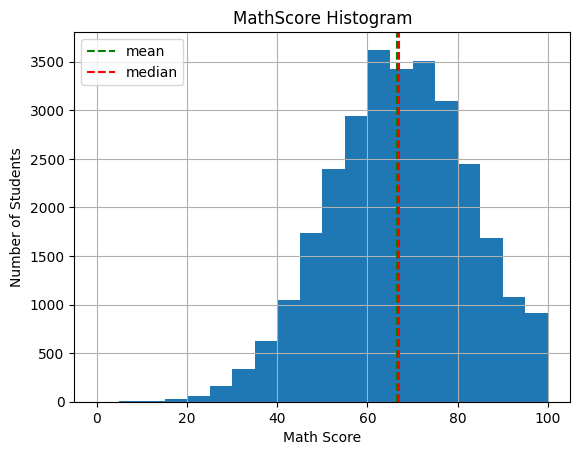

In [3]:
# a)
plt.hist(X.MathScore, bins=20)
# b)
plt.axvline(X.MathScore.mean(), linestyle='--', color = 'green', label = "mean")
plt.axvline(X.MathScore.median(), linestyle='--', color = 'red', label = "median")
# c)
plt.title('MathScore Histogram')
plt.xlabel('Math Score')
plt.ylabel('Number of Students')
# d)
plt.grid()
# e)
plt.legend(loc='upper left')

plt.show()

3. a) Make a pie chart of the feature NrSiblings. <br>
   b) Display the labels for each wedge. <br>
   c) Display the percentages within edge wedge. <br>
   d) Title the figure "NrSiblings pie chart".

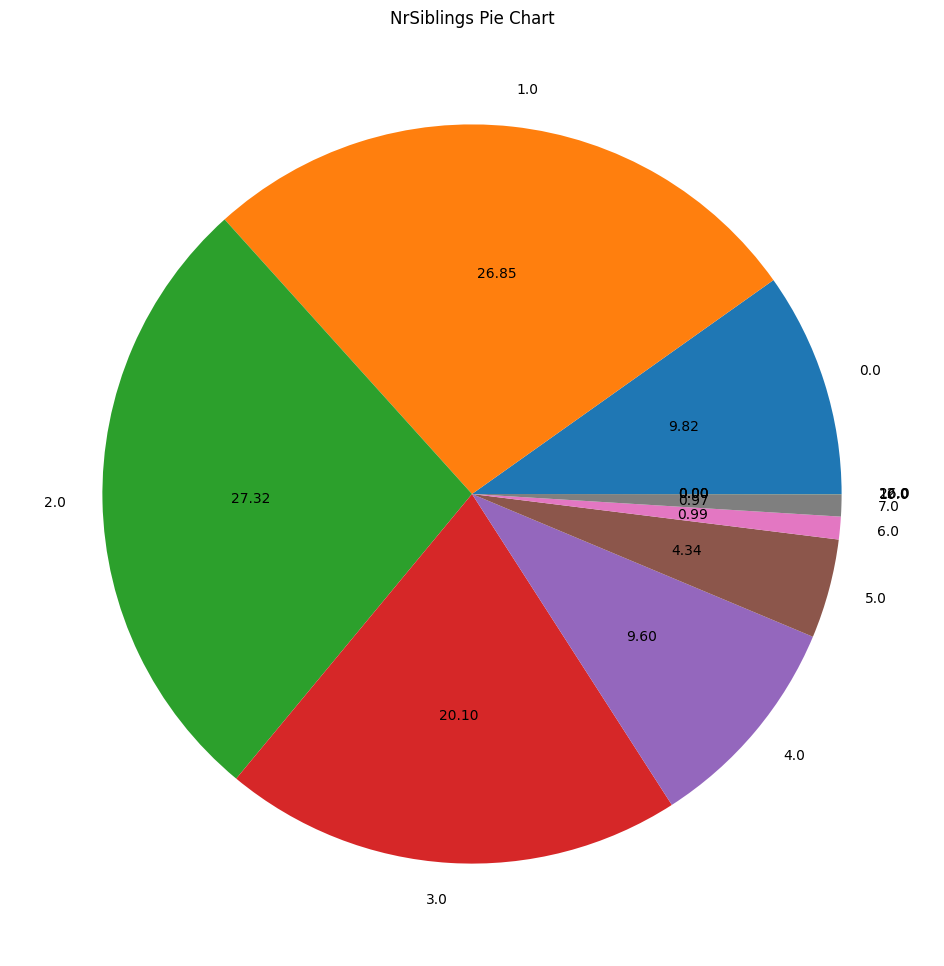

In [4]:
count_NrSiblings = X.groupby('NrSiblings').count().loc[:,'StudentId'].values
title_name = X.groupby('NrSiblings').count().index.values
plt. subplots(figsize=(12, 12))
plt.pie(count_NrSiblings, labels=title_name, autopct='%.2f')
plt.title('NrSiblings Pie Chart')
plt.show()

4. a) Create a bar chart of the average ReadingScore for each ParentEduc group. <br>
   b) Color each bar in a different color. Set the transparency of the bars to 0.7 <br>
   c) Calculate the standard deviation of the ReadingScore and add a vertical errorbar to the bar tips.

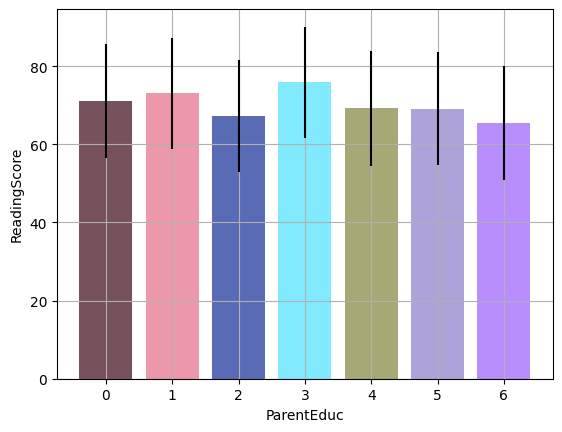

In [5]:
# unique_values_count = X['ParentEduc'].value_counts()
# print(unique_values_count)
# values are 0,1,2,3,4,5,6
# data
PE0_mean = X.loc[X.loc[:,'ParentEduc'] == 0, 'ReadingScore'].mean()
PE0_std = X.loc[X.loc[:,'ParentEduc'] == 0, 'ReadingScore'].std()
PE1_mean = X.loc[X.loc[:,'ParentEduc'] == 1, 'ReadingScore'].mean()
PE1_std = X.loc[X.loc[:,'ParentEduc'] == 1, 'ReadingScore'].std()
PE2_mean = X.loc[X.loc[:,'ParentEduc'] == 2, 'ReadingScore'].mean()
PE2_std = X.loc[X.loc[:,'ParentEduc'] == 2, 'ReadingScore'].std()
PE3_mean = X.loc[X.loc[:,'ParentEduc'] == 3, 'ReadingScore'].mean()
PE3_std = X.loc[X.loc[:,'ParentEduc'] == 3, 'ReadingScore'].std()
PE4_mean = X.loc[X.loc[:,'ParentEduc'] == 4, 'ReadingScore'].mean()
PE4_std = X.loc[X.loc[:,'ParentEduc'] == 4, 'ReadingScore'].std()
PE5_mean = X.loc[X.loc[:,'ParentEduc'] == 5, 'ReadingScore'].mean()
PE5_std = X.loc[X.loc[:,'ParentEduc'] == 5, 'ReadingScore'].std()
PE6_mean = X.loc[X.loc[:,'ParentEduc'] == 6, 'ReadingScore'].mean()
PE6_std = X.loc[X.loc[:,'ParentEduc'] == 6, 'ReadingScore'].std()


rsc_per_pe = [PE0_mean, PE1_mean, PE2_mean, PE3_mean, PE4_mean, PE5_mean, PE6_mean]
rsc_per_pe_std = [PE0_std, PE1_std, PE2_std, PE3_std, PE4_std, PE5_std, PE6_std]

title_name = X.groupby('ParentEduc').count().index.values

# plot
plt.bar(title_name, rsc_per_pe, yerr=rsc_per_pe_std, color=np.random.rand(len(title_name),3), alpha=0.7, )
plt.xlabel('ParentEduc')
plt.ylabel('ReadingScore')
plt.grid()
plt.show()

5. a) Make a figure divided into 2 rows and 2 columns. Set the figure size to 30 by 30. <br>
   b) In the top left axis:
       1) Draw a line graph of the students' MathScores in descending order.
       2) Color the span on the x axis for which the students' MathScores are less than 50 in red. Set transparency to 0.3.
   c) In the top right axis:
       1) Draw a scatter plot of MathScore vs ReadingScore.
       2) Make the bubbles representing the female students yellow and the ones representing the male students purple. Add and display labels. Set transparency to 0.1.
       3) Set the size of the bubbles to be 50*NrSiblings.
   d) In the bottom left axis:
       1) Draw a boxplot of the WrittingScore feature values.
       2) Remove fliers from the boxplot.
   e) In the borrom right axis:
       1) Draw a bar plot of the number of students using each transportation method.
       2) Make the bar plot stacked by coloring the part of the bar representing the number of students which are first ch-ildren in red and the ones who arent in blue. Add and display labels.

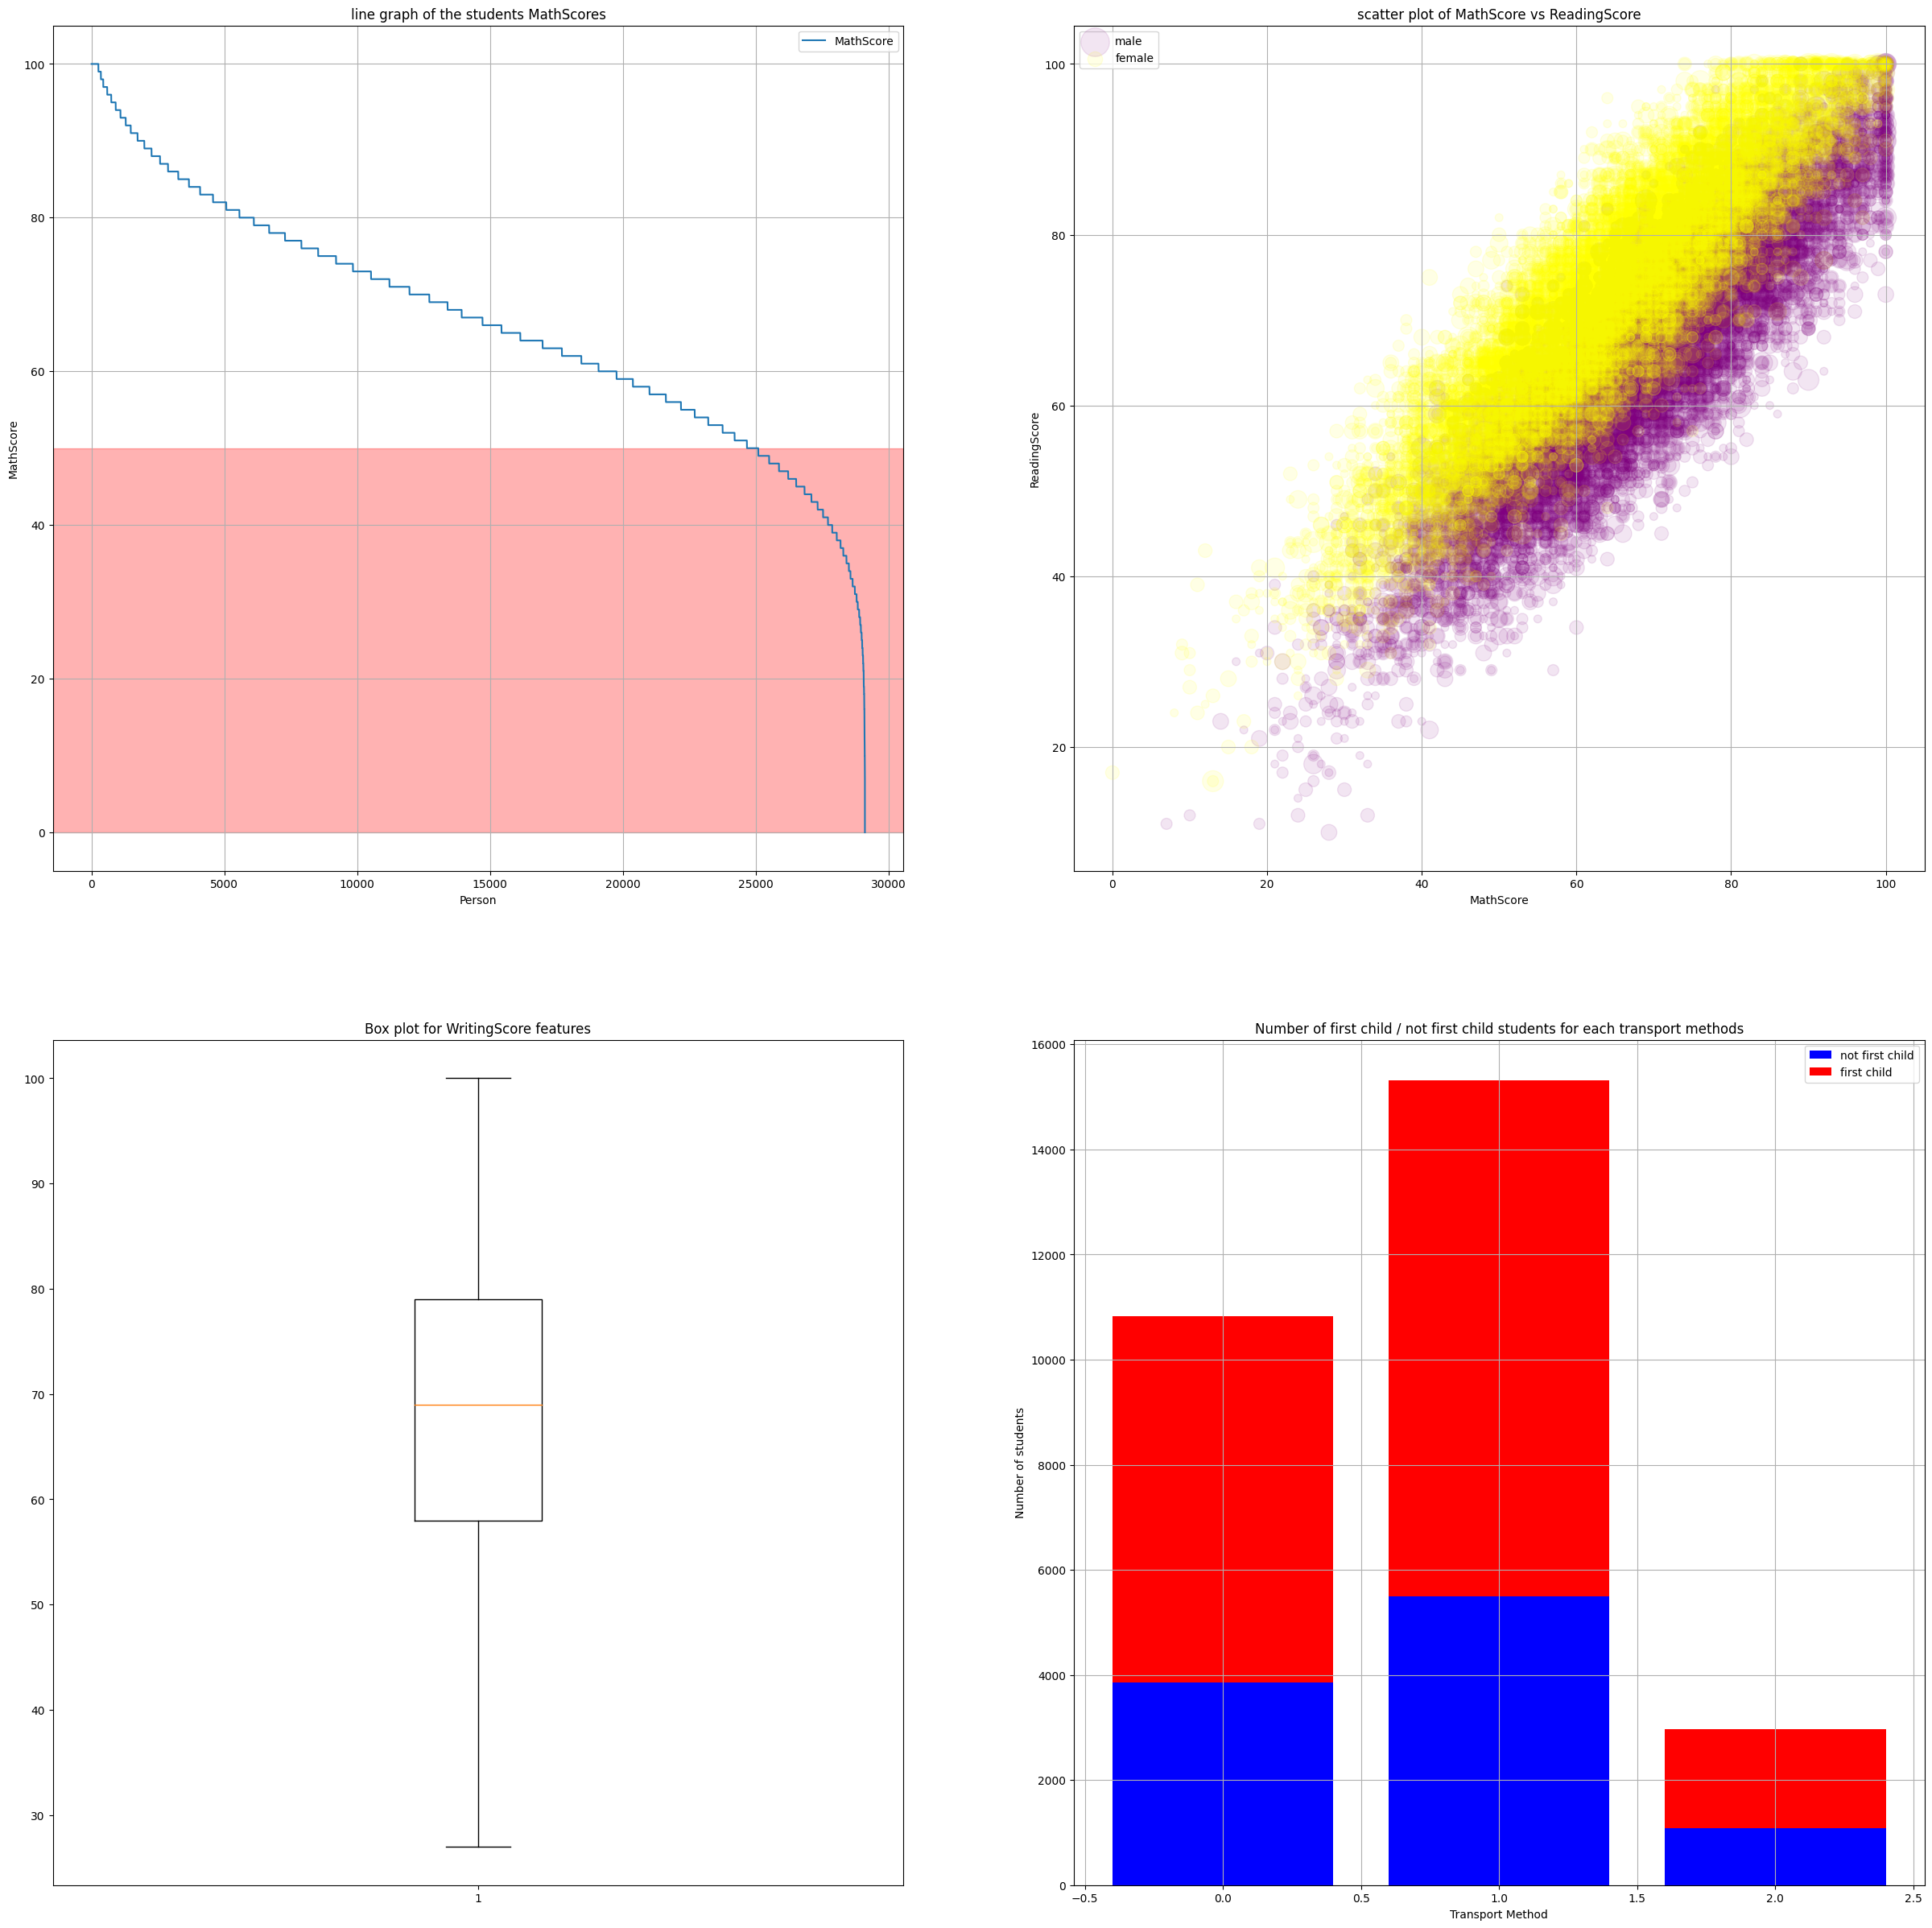

In [6]:
# a)
fig, ax = plt.subplots(2,2, figsize=(30,30))

# b)
X_tmp = X.copy()
X_tmp = X_tmp.sort_values(by=['MathScore'], ascending=False)
ax[0,0].plot([x for x in range(len(X_tmp))], X_tmp.MathScore, label='MathScore')
ax[0,0].set_ylabel('MathScore')
ax[0,0].set_xlabel('Person')
ax[0,0].legend(loc='best')
ax[0,0].grid()
ax[0,0].axhspan(0, 50, color='red', alpha=0.3)
ax[0,0].set_title('line graph of the students MathScores')

# c)
# mask
mask_female = X.Gender_female == 1.0
# sizes
sizes = X.NrSiblings*50
# plot
ax[0,1].scatter(X.loc[~mask_female,'MathScore'], X.loc[~mask_female,'ReadingScore'], s=sizes[~mask_female], alpha=0.1, c='purple', label='male')
ax[0,1].scatter(X.loc[mask_female,'MathScore'], X.loc[mask_female,'ReadingScore'], s=sizes[mask_female], alpha=0.1, c='yellow', label='female')
ax[0,1].set_xlabel('MathScore')
ax[0,1].set_ylabel('ReadingScore')
ax[0,1].grid()
ax[0,1].legend(loc='best')
ax[0,1].set_title('scatter plot of MathScore vs ReadingScore')

# d)
ax[1,0].boxplot(X.WritingScore, showfliers=False)
ax[1,0].set_title('Box plot for WritingScore features')

# e)
# mask
mask_firstc = X.IsFirstChild == 1

count_per_tp_notfirstc = X.loc[~mask_firstc,:].groupby('TransportMeans').count().loc[:,'StudentId'].values
count_per_tp_firstc = X.loc[mask_firstc,:].groupby('TransportMeans').count().loc[:,'StudentId'].values
title_name = X.groupby('TransportMeans').count().index.values

# plot
ax[1,1].bar(title_name, count_per_tp_notfirstc, color='blue', label='not first child')
ax[1,1].bar(title_name, count_per_tp_firstc, color='red', label='first child', bottom=count_per_tp_notfirstc)
ax[1,1].legend(loc='best')
ax[1,1].grid()
ax[1,1].set_xlabel('Transport Method')
ax[1,1].set_ylabel('Number of students')
ax[1,1].set_title('Number of first child / not first child students for each transport methods')

plt.show()

6. a) Using seaborn, display a heatmap of the correlation coefficients between the numeric features. <br>
   b) Set the figure size to 20 by 10. <br>
   b) Make the heatmap display 2 decimal places of the values of the correlation coefficients. <br>
   c) Use the "icefire" colormap.

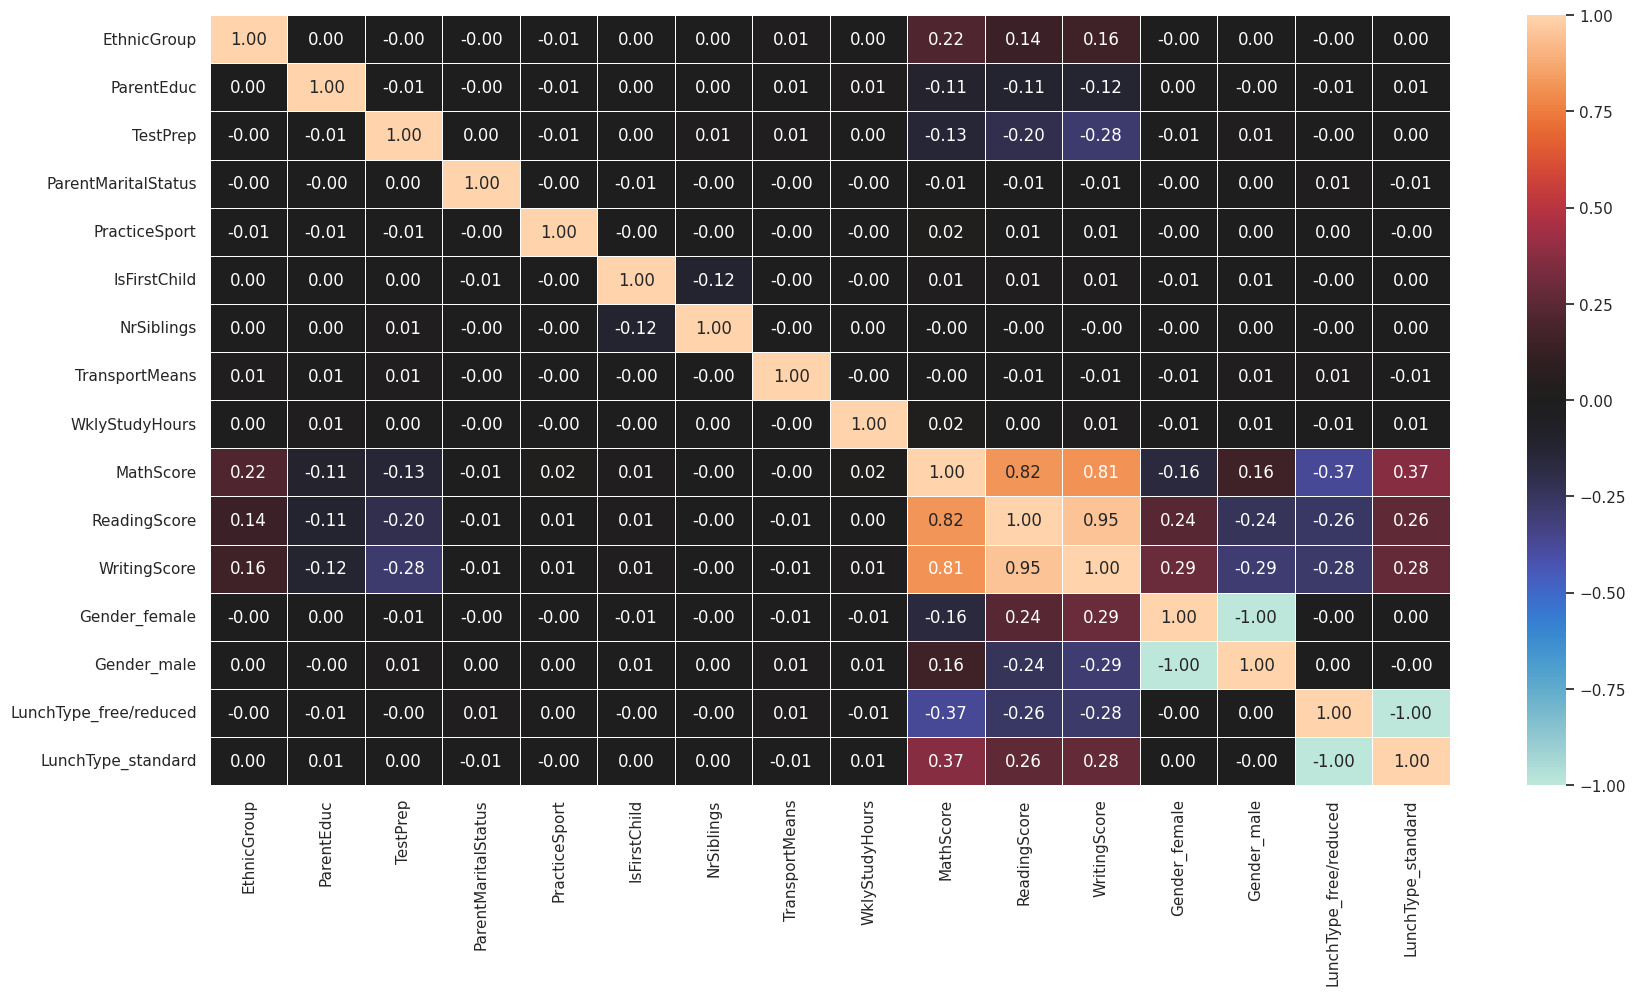

In [7]:
X_numeric = X.loc[:,~X.columns.isin(['Gender', 'LunchType', 'StudentId'])]
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(X_numeric.corr(), annot=True, fmt=".2f", cmap="icefire", linewidths=.5)
plt.show()

7. a) Make a scatterplot matrix of all the features. <br>
   b) Remove mirroring scatter plots. <br>
   c) Hue the plot by gender.

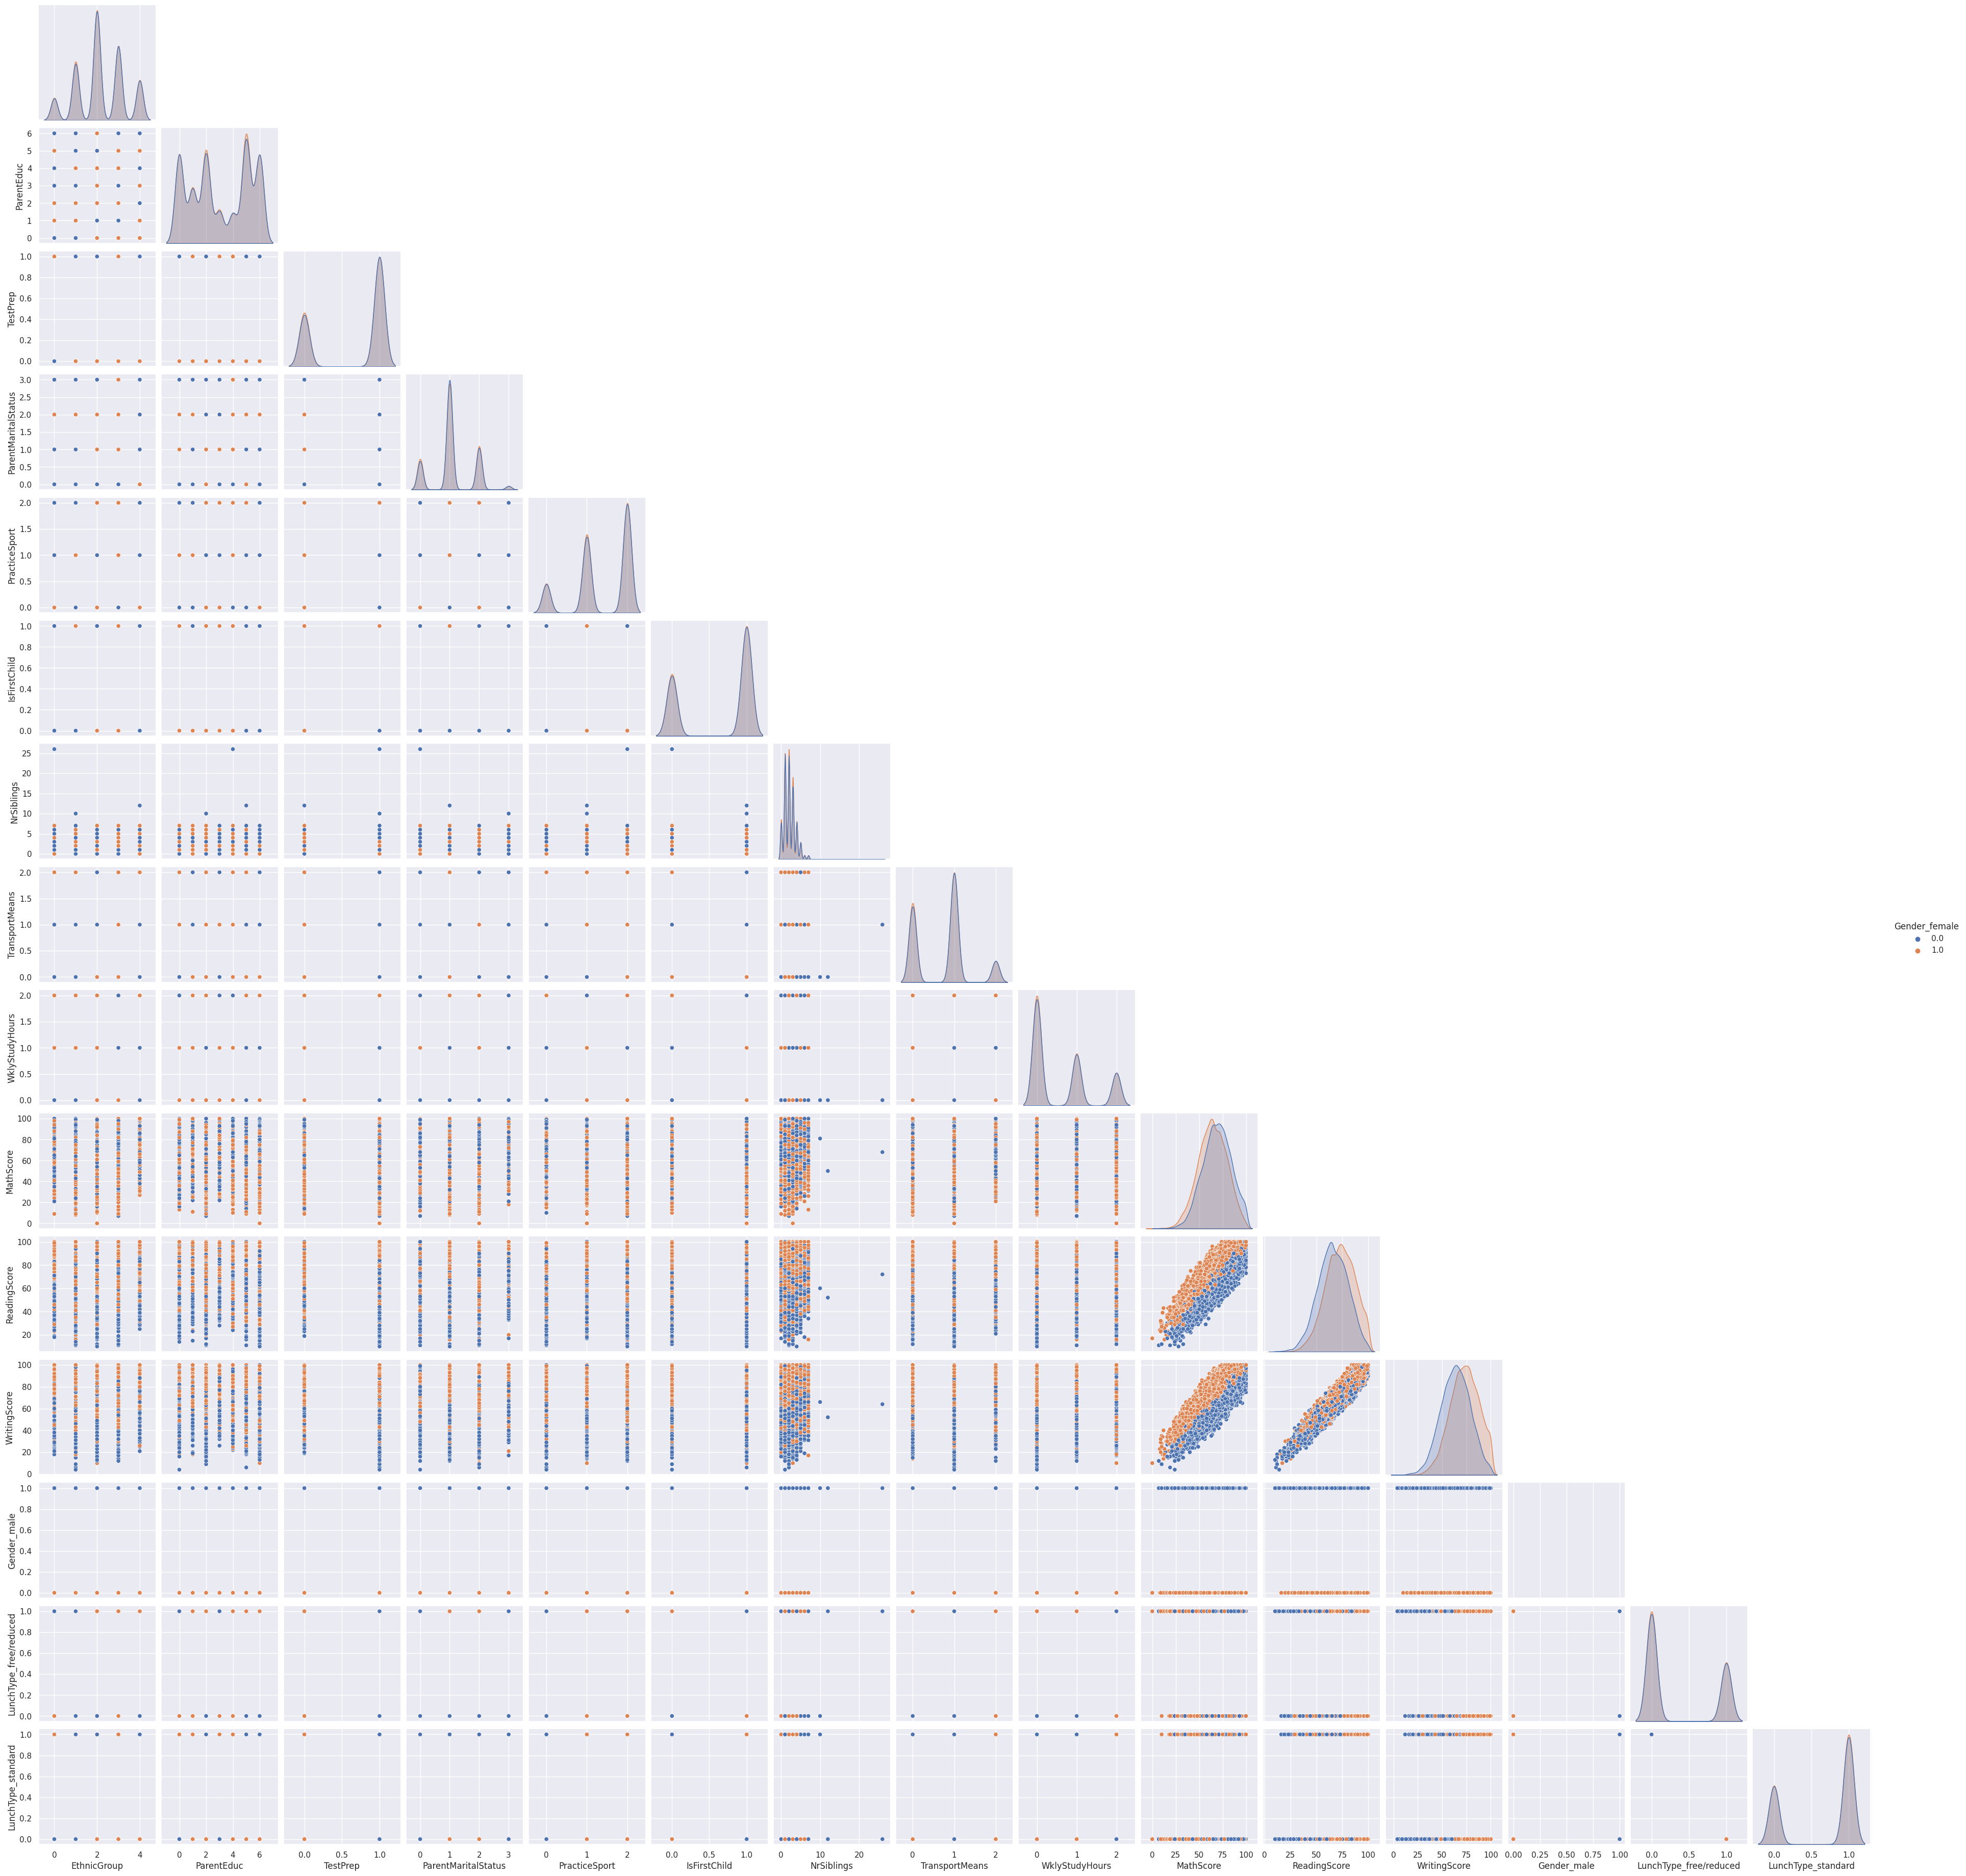

In [8]:
sns.set(rc={'figure.figsize':(25,15)})
X_2 = X.loc[:,~X.columns.isin(['StudentId'])]
sns.pairplot(X_2, hue="Gender_female", corner=True)
plt.show()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Load the cleaned dataset from the last exercise. If you haven't saved the dataset, rerun the exercise and save the final dataset.

In [3]:
df = pd.read_csv('/content/cleaned_lab1.csv')
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard,StudentId
0,female,2,1,standard,1,1,1,1,3.0,1,1,71,71,74,1.0,0.0,0.0,1.0,0
1,female,2,5,standard,1,1,2,1,0.0,2,0,69,90,88,1.0,0.0,0.0,1.0,1
2,female,1,3,standard,1,2,2,1,4.0,1,1,87,93,91,1.0,0.0,0.0,1.0,2
3,male,0,0,free/reduced,1,1,0,0,1.0,2,0,45,56,42,0.0,1.0,1.0,0.0,3
4,male,2,5,standard,1,1,2,1,0.0,1,0,76,78,75,0.0,1.0,0.0,1.0,4


In [5]:
df.describe(include='all')

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard,StudentId
count,29117,29117.000000,29117.000000,29117,29117.000000,29117.000000,29117.000000,29117.000000,29117.000000,29117.000000,29117.000000,29117.000000,29117.000000,29117.000000,29117.000000,29117.000000,29117.000000,29117.000000,29117.00000
unique,2,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,female,NaN,NaN,standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,14671,NaN,NaN,18921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.172957,3.080881,NaN,0.675276,1.109077,1.372635,0.642030,2.147714,0.730501,0.607995,66.559948,69.390081,68.429337,0.503864,0.496136,0.350173,0.649827,14558.00000
std,NaN,1.105460,2.190324,NaN,0.468280,0.676667,0.709069,0.479411,1.428635,0.633428,0.760503,15.344253,14.760190,15.447817,0.499994,0.499994,0.477032,0.477032,8405.49823
min,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,NaN,1.000000,1.000000,NaN,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,56.000000,59.000000,58.000000,0.000000,0.000000,0.000000,0.000000,7279.00000
50%,NaN,2.000000,3.000000,NaN,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,67.000000,70.000000,69.000000,1.000000,0.000000,0.000000,1.000000,14558.00000
75%,NaN,3.000000,5.000000,NaN,1.000000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,78.000000,80.000000,79.000000,1.000000,1.000000,1.000000,1.000000,21837.00000


2. a) Find the mean, median and average scores in mathematics, reading and writing. <br>
   b) Find the mean, median and average scores for males and females.<br>
   c) What is the coefficient of variation of the scores? <br>

In [15]:
# a
print("Math Score; Mean, Median, Average : ", df['MathScore'].mean(), df['MathScore'].median(), df['MathScore'].sum() / len(df['MathScore']))
print("Reading Score; Mean, Median, Average : ", df['ReadingScore'].mean(), df['ReadingScore'].median(), df['ReadingScore'].sum() / len(df['ReadingScore']))
print("Writing Score; Mean, Median, Average : ", df['WritingScore'].mean(), df['WritingScore'].median(), df['WritingScore'].sum() / len(df['WritingScore']))


Math Score; Mean, Median, Average :  66.55994779681973 67.0 66.55994779681973
Reading Score; Mean, Median, Average :  69.39008139574818 70.0 69.39008139574818
Writing Score; Mean, Median, Average :  68.42933681354535 69.0 68.42933681354535


In [21]:
# b
print("Math Score; Mean, Median : ", df.groupby('Gender')['MathScore'].mean(), df.groupby('Gender')['MathScore'].median())
print("Reading Score; Mean, Median : ", df.groupby('Gender')['ReadingScore'].mean(), df.groupby('Gender')['ReadingScore'].median())
print("Writing Score; Mean, Median : ", df.groupby('Gender')['WritingScore'].mean(), df.groupby('Gender')['WritingScore'].median())

Math Score; Mean, Median :  Gender
female    64.119419
male      69.038488
Name: MathScore, dtype: float64 Gender
female    64.0
male      69.0
Name: MathScore, dtype: float64
Reading Score; Mean, Median :  Gender
female    72.900825
male      65.824657
Name: ReadingScore, dtype: float64 Gender
female    73.0
male      66.0
Name: ReadingScore, dtype: float64
Writing Score; Mean, Median :  Gender
female    72.899189
male      63.889866
Name: WritingScore, dtype: float64 Gender
female    73.0
male      64.0
Name: WritingScore, dtype: float64


In [23]:
# c
print("Coefficient of variation; Math Score, Reading Score, Writing Score : ", df['MathScore'].std() / df['MathScore'].mean(), df['ReadingScore'].std() / df['ReadingScore'].mean(), df['WritingScore'].std() / df['WritingScore'].mean())

Coefficient of variation; Math Score, Reading Score, Writing Score :  0.23053282736702593 0.2127132583474032 0.22574844991058549


3. a) Use a statistical test to test the hypothesis:<br>
H0: the mean mathematical scores of females and males are equal.



In [42]:
# T-test
from scipy import stats
Female = df.query('Gender == "female"')
Male = df.query('Gender == "male"')

stat, p = stats.ttest_ind(Male['MathScore'], Female['MathScore'])
print("stat = ", stat, "p = ", p)

if p > 0.05:
	print('Probably the means are equal')
else:
	print('Probably means are not equal')

stat =  27.70843426303627 p =  8.09604172877808e-167
Probably means are not equal


4. a) Use a statistical test to test the hypothesis:<br>
   H0 Gender did not affect the writing scores.<br>
   H1 Gender affected the writing score.<br>

In [45]:
# T-test
stat, p = stats.ttest_ind(Male['WritingScore'], Female['WritingScore'])
print("stat = ", stat, "p = ", p)

if p > 0.05:
	print('Probably gender does not affect the writing scores')
else:
	print('Probably gender affects the writing scores')

stat =  -52.01694529394566 p =  0.0
Probably gender affects the writing scores


5. a) Statisticaly test the distribuitions of female and male scores across the three scores columns.<br>
b) Plot the distributions for each of the separate scores in both genders. <br>

stat =  5197.2356665647585 p =  0.0
Probably different distributions


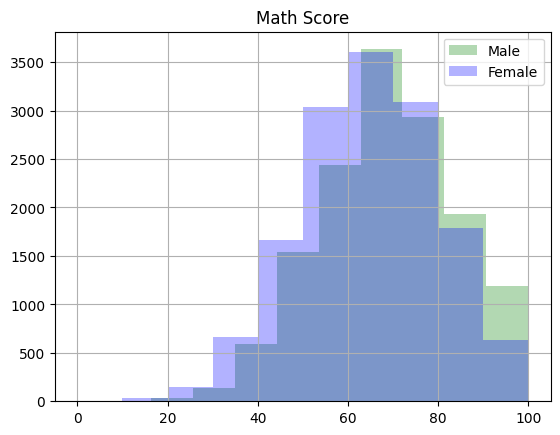

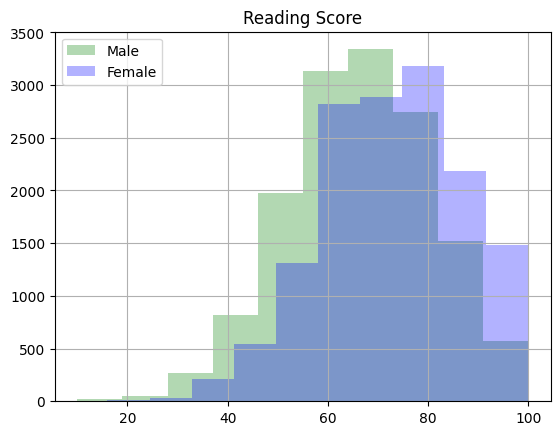

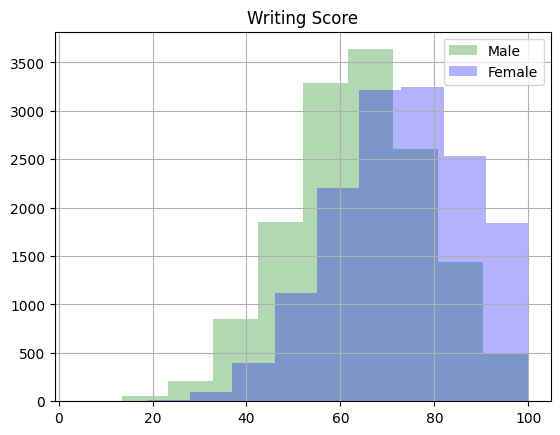

In [57]:
from scipy.stats import kruskal

stat, p = kruskal(Male['MathScore'], Female['MathScore'],
                  Male['ReadingScore'], Female['ReadingScore'],
                  Male['WritingScore'], Female['WritingScore'])

print("stat = ", stat, "p = ", p)

if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

plt.hist(Male['MathScore'], label='Male', color='green', alpha=0.3)
plt.hist(Female['MathScore'], label='Female', color='blue', alpha=0.3)
plt.legend(loc='best')
plt.title("Math Score")
plt.grid()
plt.show()

plt.hist(Male['ReadingScore'], label='Male', color='green', alpha=0.3)
plt.hist(Female['ReadingScore'], label='Female', color='blue', alpha=0.3)
plt.legend(loc='best')
plt.title("Reading Score")
plt.grid()
plt.show()

plt.hist(Male['WritingScore'], label='Male', color='green', alpha=0.3)
plt.hist(Female['WritingScore'], label='Female', color='blue', alpha=0.3)
plt.legend(loc='best')
plt.title("Writing Score")
plt.grid()
plt.show()

# Laboratory exercise 4

In this laboratory exercise you will use the questionnaire and answers given below

In [1]:
import pandas as pd

In [2]:
questionnaire = pd.DataFrame({'Q1': [1, 2, 2, 3, 2, 2, 3, 3, 2, 3],
                              'Q2': [1, 1, 1, 2, 3, 3, 2, 3, 3, 3],
                              'Q3': [1, 1, 2, 1, 2, 3, 3, 3, 2, 3]})

1. Write a function to detrmine the realiability of the questionnaire answers with Cronbach's Alpha.

In [4]:
# i couldnt find this on auditory exercises, i took this part from internet
import numpy as np
def cronbach_alpha(data):
    df_corr = data.corr()
    N = data.shape[1]

    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)

    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

print(cronbach_alpha(questionnaire))

# since it is > 0.7, it is acceptable

0.7742910373931704


2. Explain the differences between in-house data labeling, crowdsourcing and outsourcing.

In-house data labeling involves utilizing internal resources to label the data. It provides direct control over the labeling process, ensuring that it aligns with the specific needs and standards. It may be suitable for sensitive or proprietary data but can be resource intensive.

Crowdsourcing involves distributing data labeling tasks to a large, decentralized group of individuals. This approach leverages the collective intelligence of the crowd to label vast amounts of data quickly and cost effectively. Crowdsourcing is beneficial for tasks that require human judgment but may lack the specificity and control of in-house labeling.

Outsourcing data labeling involves contracting external third-party services or companies to perform the annotation tasks. This can be a cost-effective solution, especially when dealing with large datasets or specialized labeling requirements. However, it may require careful management to ensure data quality and security, and the organization may have less direct control over the labeling process compared to in-house efforts.

3. Explain the main differences between annotation for image classification, object detection and image segmentation.

In image classification, annotations involve assigning a single label or class to an entire image. The goal is to teach a model to categorize images into predefined classes. Annotations typically indicate the presence of an object or scene but don't provide information about its location or extent within the image.

Object detection annotations go beyond image classification by identifying and localizing individual objects within an image. Annotations include bounding boxes that specify the object's position and size. This enables models to recognize and locate multiple objects simultaneously, making it suitable for applications where identifying specific objects within an image is crucial.

Image segmentation annotations provide a more detailed understanding of an image by delineating the boundaries of individual objects at the pixel level. This involves outlining the contours or creating masks for each object present in the image. Image segmentation is particularly useful for tasks requiring precise understanding of object shapes and spatial relationships within an image.

# Laboratory excercise 5

The notebook contains excercise connected to the auditory excerice 6. For any questions feel free to contact assistant: eda.jovicic@fer.hr

In [5]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# set seed for consistency
np.random.seed(2)

1. Load the cleaned dataset from the first exercise. If you haven't saved the dataset, rerun the exercise and save the final dataset.

In [6]:
#load data
df = pd.read_csv('/content/cleaned_lab1.csv')
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard,StudentId
0,female,2,1,standard,1,1,1,1,3.0,1,1,71,71,74,1.0,0.0,0.0,1.0,0
1,female,2,5,standard,1,1,2,1,0.0,2,0,69,90,88,1.0,0.0,0.0,1.0,1
2,female,1,3,standard,1,2,2,1,4.0,1,1,87,93,91,1.0,0.0,0.0,1.0,2
3,male,0,0,free/reduced,1,1,0,0,1.0,2,0,45,56,42,0.0,1.0,1.0,0.0,3
4,male,2,5,standard,1,1,2,1,0.0,1,0,76,78,75,0.0,1.0,0.0,1.0,4


2. Using linear regression, model the MathScore using features: TestPrep, NrSiblings, ParentMaritalStatus and ReadingScore.

In [7]:
# Declares the model
mod = smf.ols(formula='MathScore ~ C(TestPrep) + NrSiblings + ParentMaritalStatus + ReadingScore', data=df)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              MathScore   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                 1.474e+04
Date:                Mon, 08 Jan 2024   Prob (F-statistic):               0.00
Time:                        17:39:10   Log-Likelihood:            -1.0471e+05
No. Observations:               29117   AIC:                         2.094e+05
Df Residuals:                   29112   BIC:                         2.095e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.3552      0.302     21.030      0.000       5.763       6.947
C(TestPrep)[T.1]        1.1073      0.113      9.817      0.000       0.886       1.328
NrSiblings              0.0154      0.036      0.426      0.670      -0.056       0.086
ParentMaritalStatus    -0.0410      0.076     -0.536      0.592      -0.191       0.109
ReadingScore            0.8570      0.004    239.501      0.000       0.850       0.864
==============================================================================
Omnibus:                      233.653   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.726
Skew:                          -0.010   Prob(JB):                     1.53e-34
Kurtosis:                       2.642   Cond. No.                         422.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Questions:

a) Using the summary, write down the formula with coefficients

$MathScore = 6.3552 + 1.1073∗TestPrep + 0.0154∗NrSiblings + (−0.0410)∗ParentMaterialStatus + 0.8570∗ReadingScore $

b) Are there any statisticaly important features?

Statistically important features are which has p values < 0.05. Then, TestPrep and ReadingScore are statistically important.

c) Let's interpret the data, if students do test preparation, how does that affect the outcome on the math exam?

It will be 1.1073 higher.

d) Are students who practice sport better at math exams or worse? Using linear regression, model the MathScore using only one feature: PracticeSport. Don't include intercept. Using summary, decide which students do the best at math exams - those who never practice sport, sometimes practice sport or those who do it regularly?

In [14]:
# Declare the model
mod = smf.ols(formula='MathScore ~ C(PracticeSport) - 1', data=df)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              MathScore   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     87.35
Date:                Mon, 08 Jan 2024   Prob (F-statistic):           1.51e-38
Time:                        17:48:56   Log-Likelihood:            -1.2074e+05
No. Observations:               29117   AIC:                         2.415e+05
Df Residuals:                   29114   BIC:                         2.415e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(PracticeSport)[0]    64.1576      0.244    262.426      0.000      63.678      64.637
C(PracticeSport)[1]    67.8441      0.150    452.998      0.000      67.551      68.138
C(PracticeSport)[2]    66.2896      0.126    526.520      0.000      66.043      66.536
==============================================================================
Omnibus:                      234.462   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              214.722
Skew:                          -0.171   Prob(JB):                     2.36e-47
Kurtosis:                       2.756   Cond. No.                         1.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Students who sometimes participate are better than who do it rugularly, and who do it regularly are better than who never participate.

# Laboratory exercise 6

The notebook contains exercises connected to auditory exercise 7. For any questions feel free to contact assistant: eda.jovicic@fer.hr

The main task of this notebook is to make predictions using supported learning with the Scikit Learn library. The goal is to predict the grade in Math considering other features of the student.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

1. Load the cleaned dataset from the first exercise. If you haven't saved the dataset, rerun the exercise and save the final dataset.

In [63]:
#solution
df = pd.read_csv('/content/cleaned_lab1.csv')
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard,StudentId
0,female,2,1,standard,1,1,1,1,3.0,1,1,71,71,74,1.0,0.0,0.0,1.0,0
1,female,2,5,standard,1,1,2,1,0.0,2,0,69,90,88,1.0,0.0,0.0,1.0,1
2,female,1,3,standard,1,2,2,1,4.0,1,1,87,93,91,1.0,0.0,0.0,1.0,2
3,male,0,0,free/reduced,1,1,0,0,1.0,2,0,45,56,42,0.0,1.0,1.0,0.0,3
4,male,2,5,standard,1,1,2,1,0.0,1,0,76,78,75,0.0,1.0,0.0,1.0,4


2. Transform the MathScore feature into grades (1-5) using the following scoring system:

|   MathScore |  Grade  |
| ----------- | ------- |
|  88 - 100   |    5    |
|  75 - 87    |    4    |
|  63 - 74    |    3    |
|  50 - 62    |    2    |
|   0 - 49    |    1    |

In [64]:
#solution
df.loc[df.MathScore.between(0,49), 'MathScore'] = 1
df.loc[df.MathScore.between(50,62), 'MathScore'] = 2
df.loc[df.MathScore.between(63,74), 'MathScore'] = 3
df.loc[df.MathScore.between(75,87), 'MathScore'] = 4
df.loc[df.MathScore.between(88,100), 'MathScore'] = 5
print(df['MathScore'].value_counts())

3    8503
2    7393
4    6626
1    4016
5    2579
Name: MathScore, dtype: int64


3. Divide the dataset into features (X) and predictions (y). For features we will use all the columns except MathScore, ReadingScore and WritingScore. For predictions we will use the MathScore column. Split the dataset into training and testing sets. The split should be done in a  70-30% ratio.

In [65]:
#X (all features except MathScore, ReadingScore, WritingScore) and y (MathScore)
X = df.drop(['MathScore', 'ReadingScore', 'WritingScore','Gender', 'LunchType', 'WklyStudyHours'], axis=1)
y = df['MathScore']
X.describe()

,EthnicGroup,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard,StudentId
count,29117.000000,29117.000000,29117.000000,29117.000000,29117.000000,29117.000000,29117.000000,29117.000000,29117.000000,29117.000000,29117.000000,29117.000000,29117.00000
mean,2.172957,3.080881,0.675276,1.109077,1.372635,0.642030,2.147714,0.730501,0.503864,0.496136,0.350173,0.649827,14558.00000
std,1.105460,2.190324,0.468280,0.676667,0.709069,0.479411,1.428635,0.633428,0.499994,0.499994,0.477032,0.477032,8405.49823
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7279.00000
50%,2.000000,3.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,14558.00000
75%,3.000000,5.000000,1.000000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21837.00000
max,4.000000,6.000000,1.000000,3.000000,2.000000,1.000000,26.000000,2.000000,1.000000,1.000000,1.000000,1.000000,29116.00000


In [66]:
#splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

4. Create a Random Forest model, with max_depth=5 and n_estimators=20. Train the model using training set, and then test it on testing set. Display the confusion matrix. Show precision, recall and F1 score for all grades.

              precision    recall  f1-score   support

           1       0.47      0.07      0.13      1174
           2       0.35      0.40      0.37      2200
           3       0.33      0.62      0.43      2547
           4       0.36      0.22      0.27      2027
           5       1.00      0.00      0.01       788

    accuracy                           0.34      8736
   macro avg       0.50      0.26      0.24      8736
weighted avg       0.42      0.34      0.30      8736



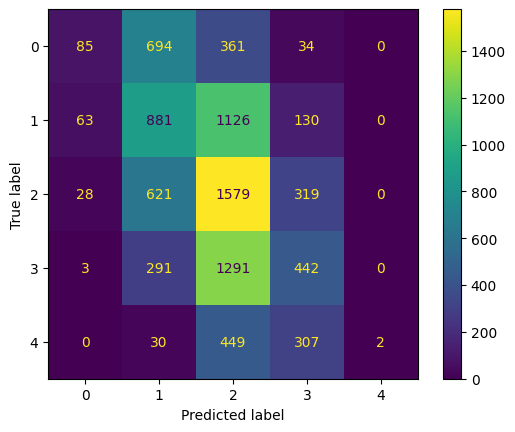

In [67]:
#Random Forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

clf = RandomForestClassifier(max_depth=5, random_state=0, n_estimators=20)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

print(classification_report(y_test, y_pred))


5. The accuracy of our model is not the best. The reason could be having too many possible classes (grades). Let's transform the data again, but this time, instead of predicting grades, we want to predict whether the student will pass (grades 2, 3, 4 and 5) or fail (grade 1) math. After transforming the MathScore accordingly (0 - failed, 1 - passed), repeat task 4 and compare the results.

In [68]:
#transform grades into failed (0) or passed (1)
df.loc[(df.MathScore == 1), 'MathScore'] = 0
df.loc[(df.MathScore > 1), 'MathScore'] = 1
print(df['MathScore'].value_counts())

1    25101
0     4016
Name: MathScore, dtype: int64


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1174
           1       0.87      1.00      0.93      7562

    accuracy                           0.87      8736
   macro avg       0.43      0.50      0.46      8736
weighted avg       0.75      0.87      0.80      8736



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


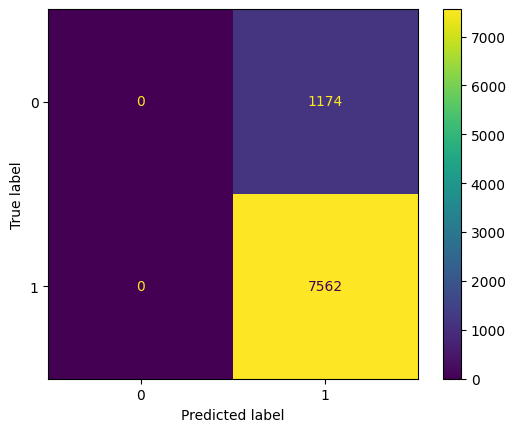

In [69]:
#Random Forest model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(max_depth=5, random_state=0, n_estimators=20)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

print(classification_report(y_test, y_pred))

6. Compare the results. Did our model work better in the first case or the second? Explain why and suggest a way to improve it.

It works better on the second case. It is because when we have more labels, some labels are rare and it makes predicting harder. We can improve it with cross-validation, by running training and testing multiple times we will be able to choose best model which takes more care about unseen and rare data, not underfitted nor overfitted.